<a href="https://colab.research.google.com/github/spooozy/Machine-learning-methods/blob/main/Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Алгоритм градиентного спуска

In [ ]:
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
N_SAMPLES = 1000
N_FEATURES = 2
NOISE = 1
RANDOM_STATE = 42
ETA = 0.1
ETA_MIN = 0.1
MAX_ITER = 1e4
MIN_W_DIST = 1e-8
MIN_ERROR = 1
EXPERIMENTS_NUM = 8

In [ ]:
X0, y0 = make_regression(n_samples=N_SAMPLES, n_features=N_FEATURES, noise=NOISE, random_state=RANDOM_STATE)
w0 = np.zeros(N_FEATURES)

In [ ]:
def MSError(X, w, y): #Mean Squared Error
    y_pred = X.dot(w)
    return (np.sum((y_pred - y)**2)) / len(y)

In [ ]:
def gradient_descent(X, y, w):
  w_dist = 1000
  iter_num = 0
  errors = []
  error = 100
  while w_dist > MIN_W_DIST and iter_num < MAX_ITER and error > MIN_ERROR:
    y_pred = np.dot(X, w)
    dQ = 2 / y.shape[0] * np.dot(X.T, y_pred - y)
    new_w = w - ETA * dQ
    w_dist = np.linalg.norm(new_w - w, ord=2)
    error = MSError(X, new_w, y)
    errors.append(error)
    iter_num += 1
    w = new_w

  return errors, iter_num

In [ ]:
def get_eta_values():
  eta_values = []
  for i in range(1, EXPERIMENTS_NUM + 1):
    eta_values.append(ETA_MIN * i)

  return eta_values

### Несколько экспериментов для градиентного спуска

Text(0, 0.5, 'Last Iteration Index')

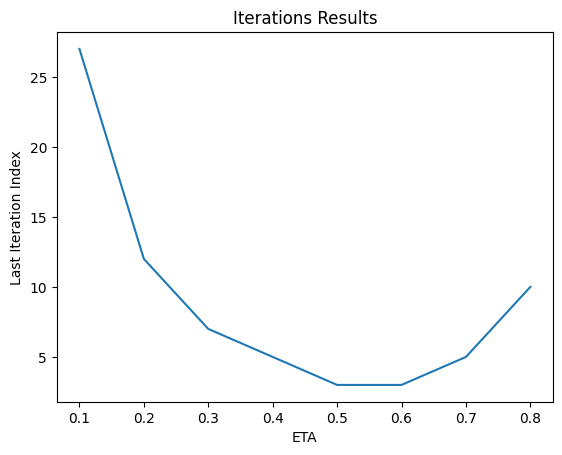

In [ ]:
iterations_results = []
errors = []
last_iteration_num = 0
ETA_MIN = 0.1

eta_values = get_eta_values()

for i in range(EXPERIMENTS_NUM):
  ETA = eta_values[i]
  errors, last_iteration_num = gradient_descent(X0, y0, w0.copy())
  iterations_results.append(last_iteration_num)

plt.plot(eta_values, iterations_results)
plt.title("Iterations Results")
plt.xlabel("ETA")
plt.ylabel("Last Iteration Index")

### Один ксперимент для градиентного спуска

In [ ]:
def single_gradient_experiment(eta):
  ETA = eta
  errors = []
  last_iteration_num = 0
  errors, last_iteration_num = gradient_descent(X0, y0, w0.copy())

  print(f"Last iteration num: {last_iteration_num}")


  plt.plot(range(len(errors)), errors)
  plt.title('MSE')
  plt.xlabel('Iteration number')
  plt.ylabel('MSE')

  plt.show()

Last iteration num: 27


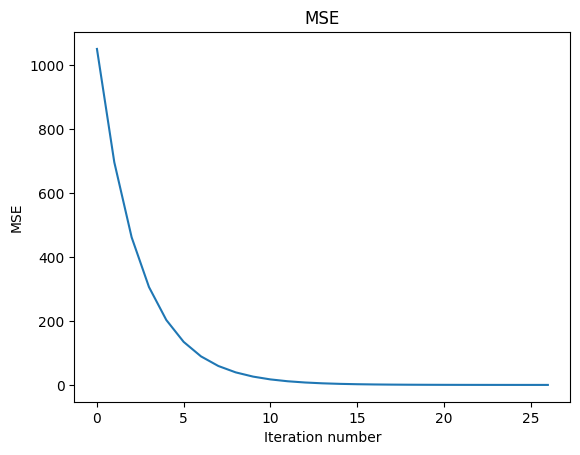

In [ ]:
single_gradient_experiment(0.4)

### Стохастический спуск

In [ ]:
def stochastic_gradient_descent(X, y, w):
    w_dist = 1000
    iter_num = 0
    errors = []
    error = 100
    n_samples = X.shape[0]

    while w_dist > MIN_W_DIST and iter_num < MAX_ITER and error > MIN_ERROR:
        random_index = np.random.randint(0, n_samples)
        X_i = X[random_index:random_index+1]
        y_i = y[random_index:random_index+1]

        y_pred_i = np.dot(X_i, w)
        dQ = 2 * np.dot(X_i.T, y_pred_i - y_i)

        new_w = w - ETA * dQ.flatten()
        w_dist = np.linalg.norm(new_w - w, ord=2)
        error = MSError(X, new_w, y)
        errors.append(error)
        iter_num += 1
        w = new_w

    return errors, iter_num

### Один эксперимент стохастического спуска

In [ ]:
def single_stochastic_experiment(eta):
  ETA = eta
  errors = []
  last_iteration_num = 0
  errors, last_iteration_num = stochastic_gradient_descent(X0, y0, w0.copy())

  print(f"Last iteration num: {last_iteration_num}")


  plt.plot(range(len(errors)), errors)
  plt.title('MSE')
  plt.xlabel('Iteration number')
  plt.ylabel('MSE')

  plt.show()

Last iteration num: 35


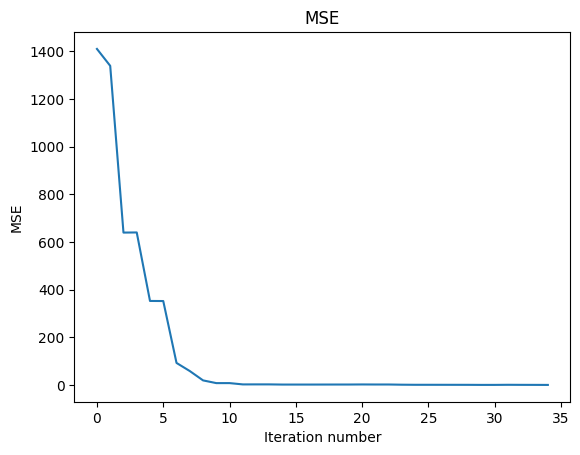

In [ ]:
single_stochastic_experiment(0.0025)

### Несколько экспериментов стохастического спуска

Text(0, 0.5, 'Last Iteration Index')

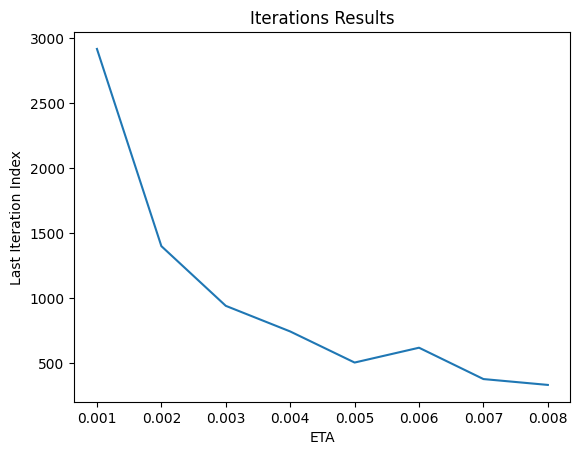

In [ ]:
iterations_results = []
errors = []
last_iteration_num = 0
ETA_MIN = 0.001

eta_values = get_eta_values()

for i in range(EXPERIMENTS_NUM):
  ETA = eta_values[i]
  errors, last_iteration_num = stochastic_gradient_descent(X0, y0, w0.copy())
  iterations_results.append(last_iteration_num)

plt.plot(eta_values, iterations_results)
plt.title("Iterations Results")
plt.xlabel("ETA")
plt.ylabel("Last Iteration Index")

### Итоги

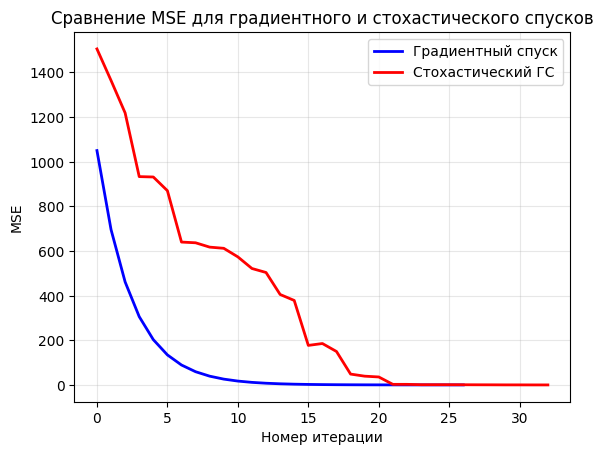

In [ ]:
ETA = 0.1

errors_gd, num1 = gradient_descent(X0, y0, w0)
errors_sgd, num2 = stochastic_gradient_descent(X0, y0, w0.copy())

plt.plot(range(len(errors_gd)), errors_gd, 'b-', linewidth=2, label='Градиентный спуск')
plt.plot(range(len(errors_sgd)), errors_sgd, 'r-', linewidth=2, label='Стохастический ГС')
plt.title('Сравнение MSE для градиентного и стохастического спусков')
plt.xlabel('Номер итерации')
plt.ylabel('MSE')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### L2

In [ ]:
def gradient_descent_with_L2(X, y, w, eta, alpha=0.01):
    w_dist = 1000
    iter_num = 0
    errors = []
    error = 100
    while w_dist > MIN_W_DIST and iter_num < MAX_ITER and error > MIN_ERROR:
        y_pred = np.dot(X, w)
        dQ = 2 / y.shape[0] * np.dot(X.T, y_pred - y)
        dQ_L2 = 2 * alpha * w
        total_gradient = dQ + dQ_L2

        new_w = w - eta * total_gradient
        w_dist = np.linalg.norm(new_w - w, ord=2)
        error = MSError(X, new_w, y)
        errors.append(error)
        iter_num += 1
        w = new_w

    return iter_num, w

In [ ]:
def stochastic_gradient_descent_with_L2(X, y, w, eta, alpha=0.01):
    w_dist = 1000
    iter_num = 0
    errors = []
    error = 100
    n_samples = X.shape[0]

    while w_dist > MIN_W_DIST and iter_num < MAX_ITER and error > MIN_ERROR:
        random_index = np.random.randint(0, n_samples)
        X_i = X[random_index:random_index+1]
        y_i = y[random_index:random_index+1]
        y_pred_i = np.dot(X_i, w)
        dQ = 2 * np.dot(X_i.T, y_pred_i - y_i)
        dQ_L2 = 2 * alpha * w
        total_gradient = dQ.flatten() + dQ_L2

        new_w = w - eta * total_gradient
        w_dist = np.linalg.norm(new_w - w, ord=2)
        error = MSError(X, new_w, y)
        errors.append(error)
        iter_num += 1
        w = new_w

    return iter_num, w

In [ ]:
l2_coefs = np.random.uniform(0.01, 100, 20)
l2_coefs = np.sort(l2_coefs)

Коэффициент 1/20: 7.436798
Коэффициент 2/20: 13.147313
Коэффициент 3/20: 15.720105
Коэффициент 4/20: 15.997051
Коэффициент 5/20: 20.536637
Коэффициент 6/20: 29.110067
Коэффициент 7/20: 41.501168
Коэффициент 8/20: 51.898875
Коэффициент 9/20: 53.268731
Коэффициент 10/20: 57.704141
Коэффициент 11/20: 60.186021
Коэффициент 12/20: 65.339341
Коэффициент 13/20: 67.187446
Коэффициент 14/20: 78.596962
Коэффициент 15/20: 82.186562
Коэффициент 16/20: 85.148935
Коэффициент 17/20: 86.509810
Коэффициент 18/20: 86.993509
Коэффициент 19/20: 92.214990
Коэффициент 20/20: 92.323064


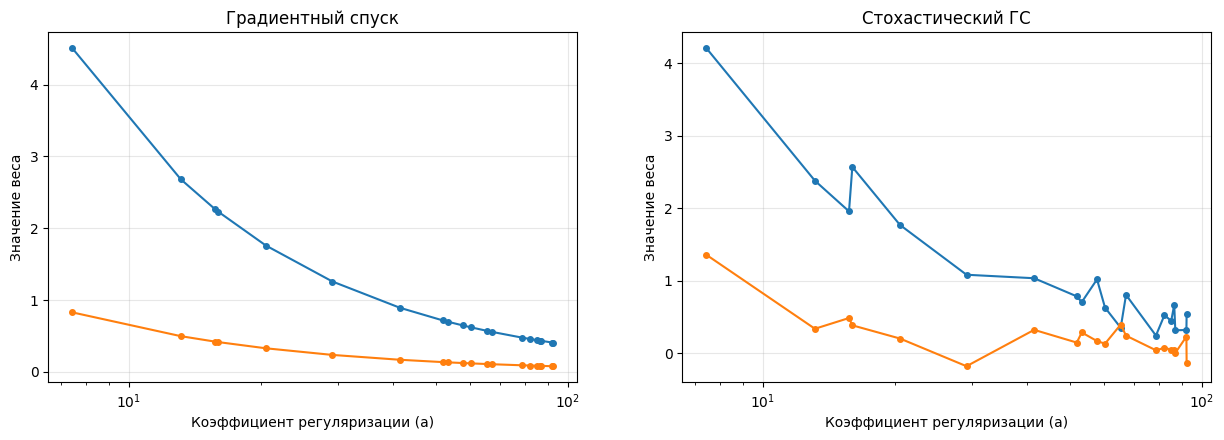

In [ ]:
weights_gd = []
weights_sgd = []
eta = 0.001

for i, l2_coef in enumerate(l2_coefs):
    print(f"Коэффициент {i+1}/20: {l2_coef:.6f}")

    iters_gd, w_gd = gradient_descent_with_L2(X0, y0, w0.copy(), eta, l2_coef)
    weights_gd.append(w_gd)

    iters_sgd, w_sgd = stochastic_gradient_descent_with_L2(X0, y0, w0.copy(), eta, l2_coef)
    weights_sgd.append(w_sgd)

weights_gd = np.array(weights_gd)
weights_sgd = np.array(weights_sgd)

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
for feature in range(N_FEATURES):
    plt.semilogx(l2_coefs, weights_gd[:, feature], 'o-', linewidth=1.5, markersize=4, label=f'w{feature}')
plt.title('Градиентный спуск')
plt.xlabel('Коэффициент регуляризации (a)')
plt.ylabel('Значение веса')
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 2)
for feature in range(N_FEATURES):
    plt.semilogx(l2_coefs, weights_sgd[:, feature], 'o-', linewidth=1.5, markersize=4, label=f'w{feature}')
plt.title('Стохастический ГС')
plt.xlabel('Коэффициент регуляризации (a)')
plt.ylabel('Значение веса')
plt.grid(True, alpha=0.3)